# AMM Test

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

<Figure size 640x480 with 0 Axes>

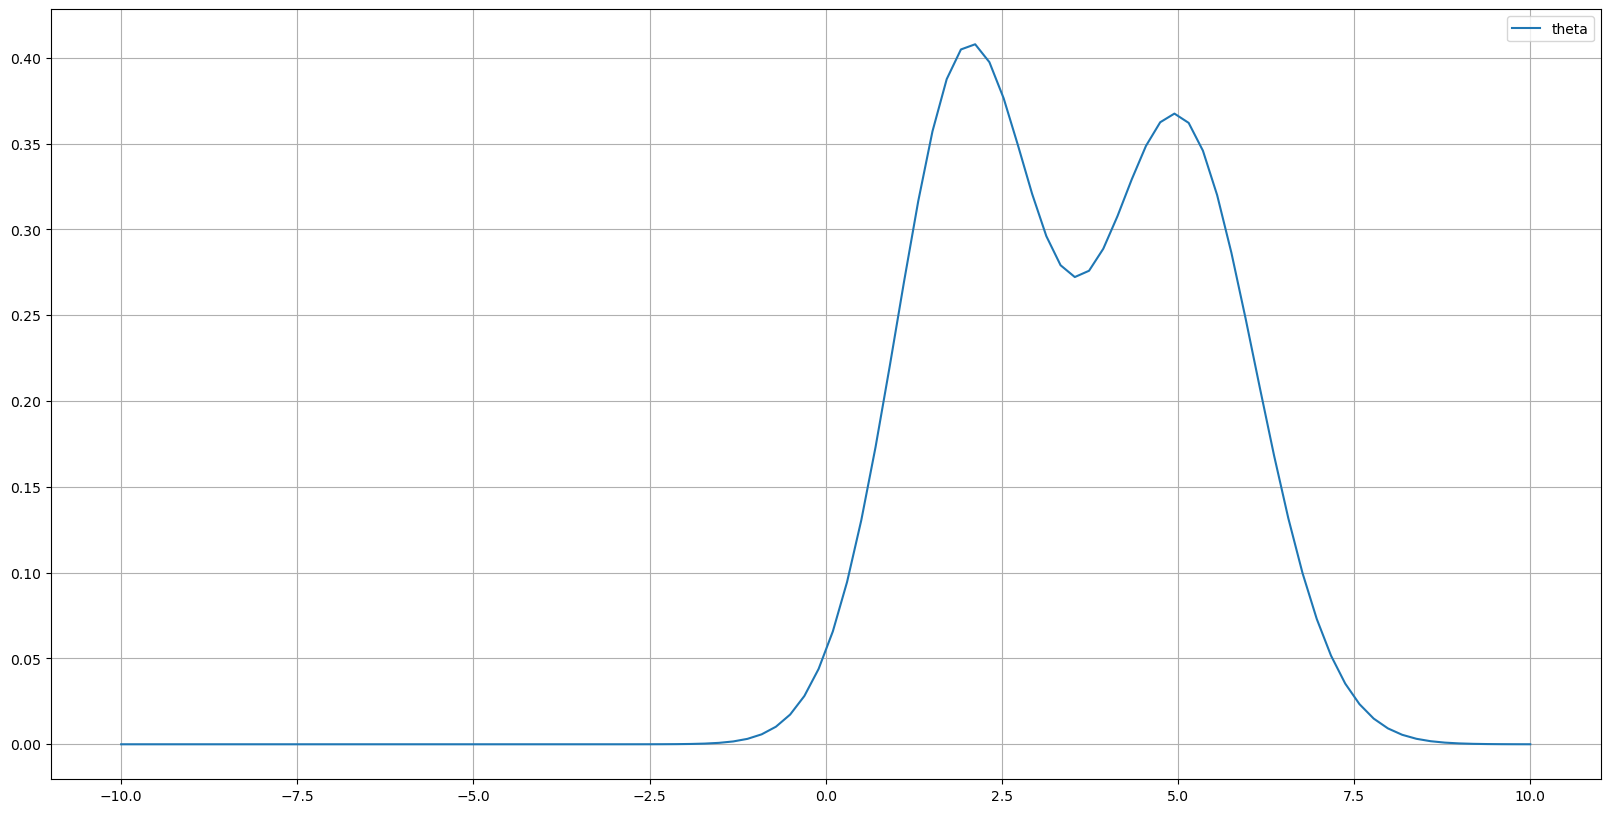

In [30]:
# Define J(theta) and theta states
theta = np.linspace(-10, 10, 100) 
def gauss(x, m, s):
    res = 1 / (np.sqrt(2 * np.pi) * s)
    res *= np.exp(-((x-m)**2) / (2 * s**2))
    return res
J_theta = lambda w: gauss(w, 2, 1) + gauss(w, 5, 1.1) 

plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(theta, J_theta(theta), label="theta")
plt.grid()
plt.legend(loc="best")
plt.show()

In [60]:
# Fake PGPE
ite = 100000 * 3
initial_rho = 5 # mean
batch = 5000
alpha = 0.5
sigma = 0.98

def sample_thetas(mean, n_samples):
    res = np.random.normal(mean, sigma, n_samples)
    return res

def learn():
    rho = initial_rho
    rhos = np.zeros(ite, dtype=np.float64)
    grads = np.zeros(ite, dtype=np.float64)
    j_rho = np.zeros(ite, dtype=np.float64)
    for i in tqdm(range(ite)):
        thetas = sample_thetas(rho, batch)
        perf = J_theta(thetas)
        scores = (thetas - np.ones(batch) * rho) / (sigma ** 3)
        grad = np.mean(scores * perf)
        rho = rho + alpha * grad
        '''print(f"Batch {i}")
        print(f"Sampled thetas {thetas}")
        print(f"Last gradient {grad}")
        print(f"New rho {rho}")
        print("----------------")'''
        rhos[i] = rho
        grads[i] = grad
        j_rho[i] = np.mean(perf)
    return rhos, grads, j_rho

rhos, grads, j_rho = learn()

100%|██████████| 300000/300000 [01:26<00:00, 3485.94it/s]


<Figure size 640x480 with 0 Axes>

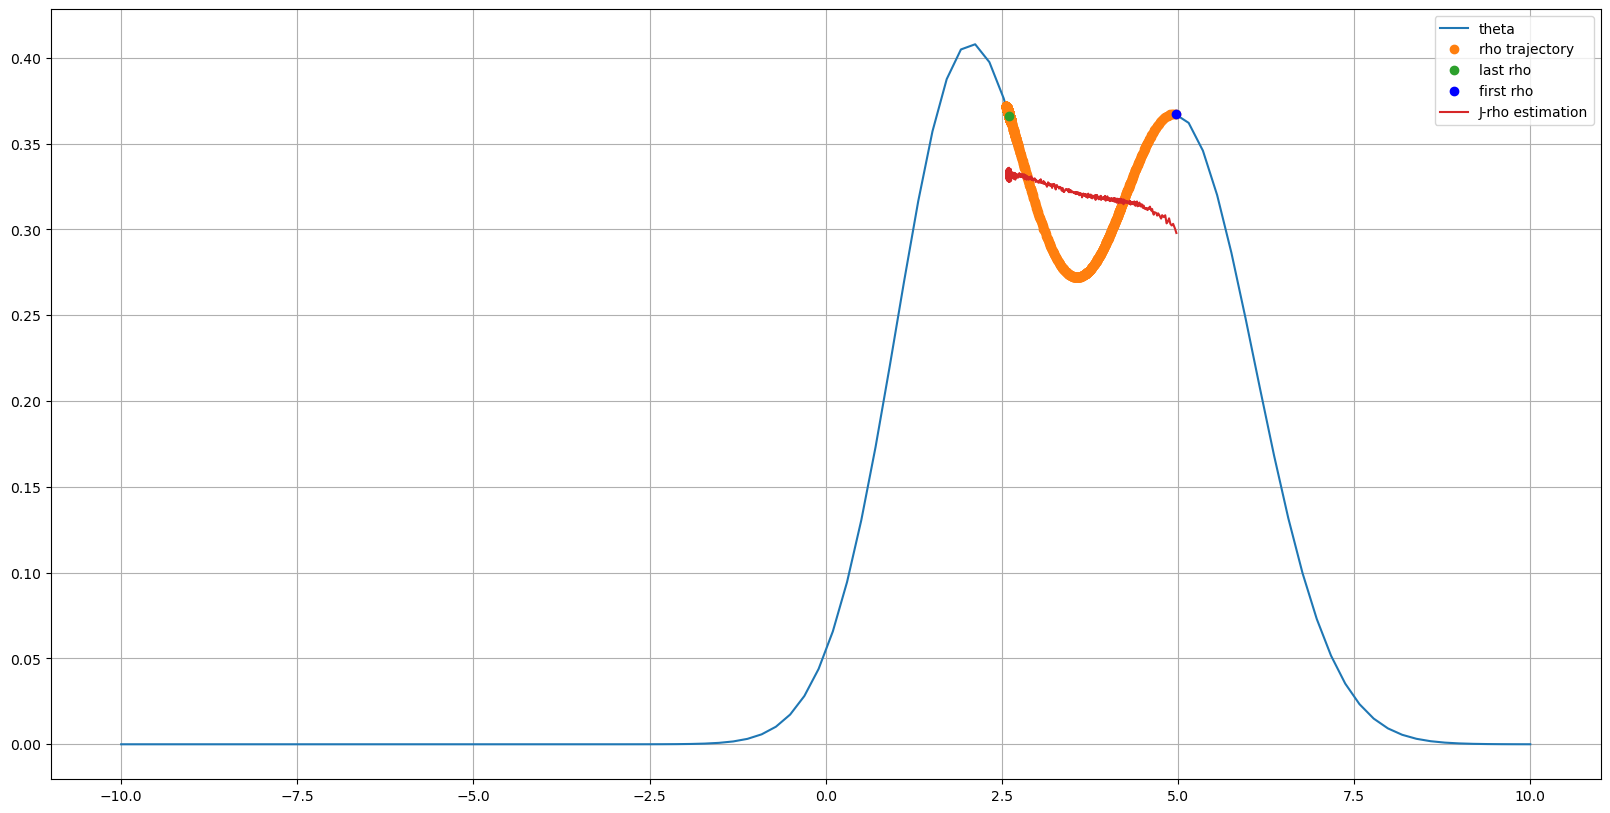

In [65]:
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(theta, J_theta(theta), label="theta")
plt.plot(rhos, J_theta(rhos), "o", label="rho trajectory")
plt.plot(rhos[-1], J_theta(rhos[-1]), "o", label="last rho")
plt.plot(rhos[0], J_theta(rhos[0]), "o", color="blue", label="first rho")
plt.plot(rhos, j_rho, label="J-rho estimation")
plt.grid()
plt.legend(loc="best")
plt.show()

<Figure size 640x480 with 0 Axes>

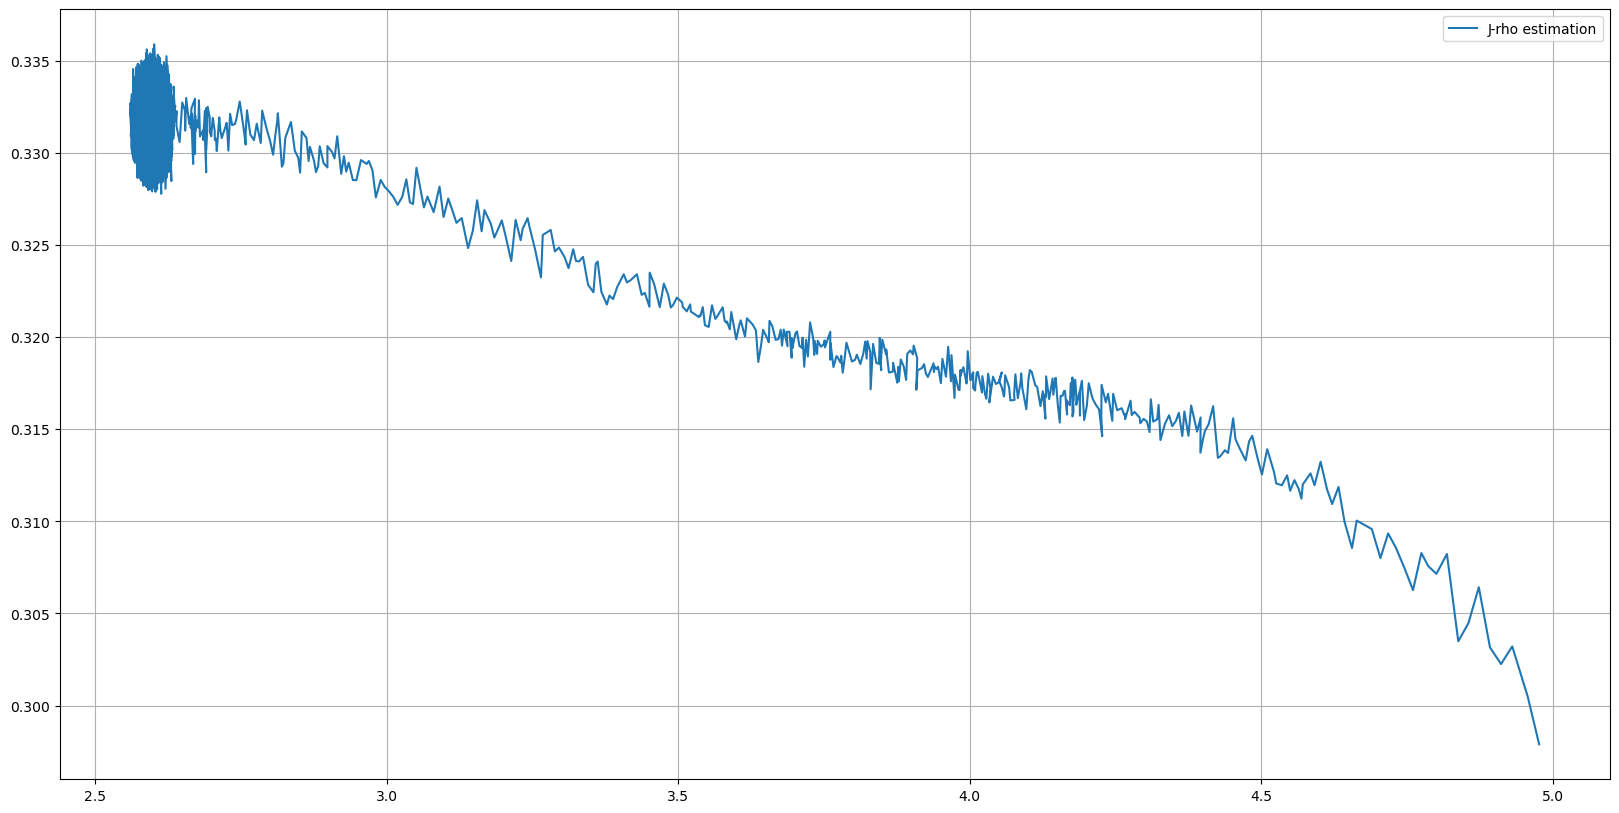

In [64]:
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(rhos, j_rho, label="J-rho estimation")
plt.legend(loc="best")
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

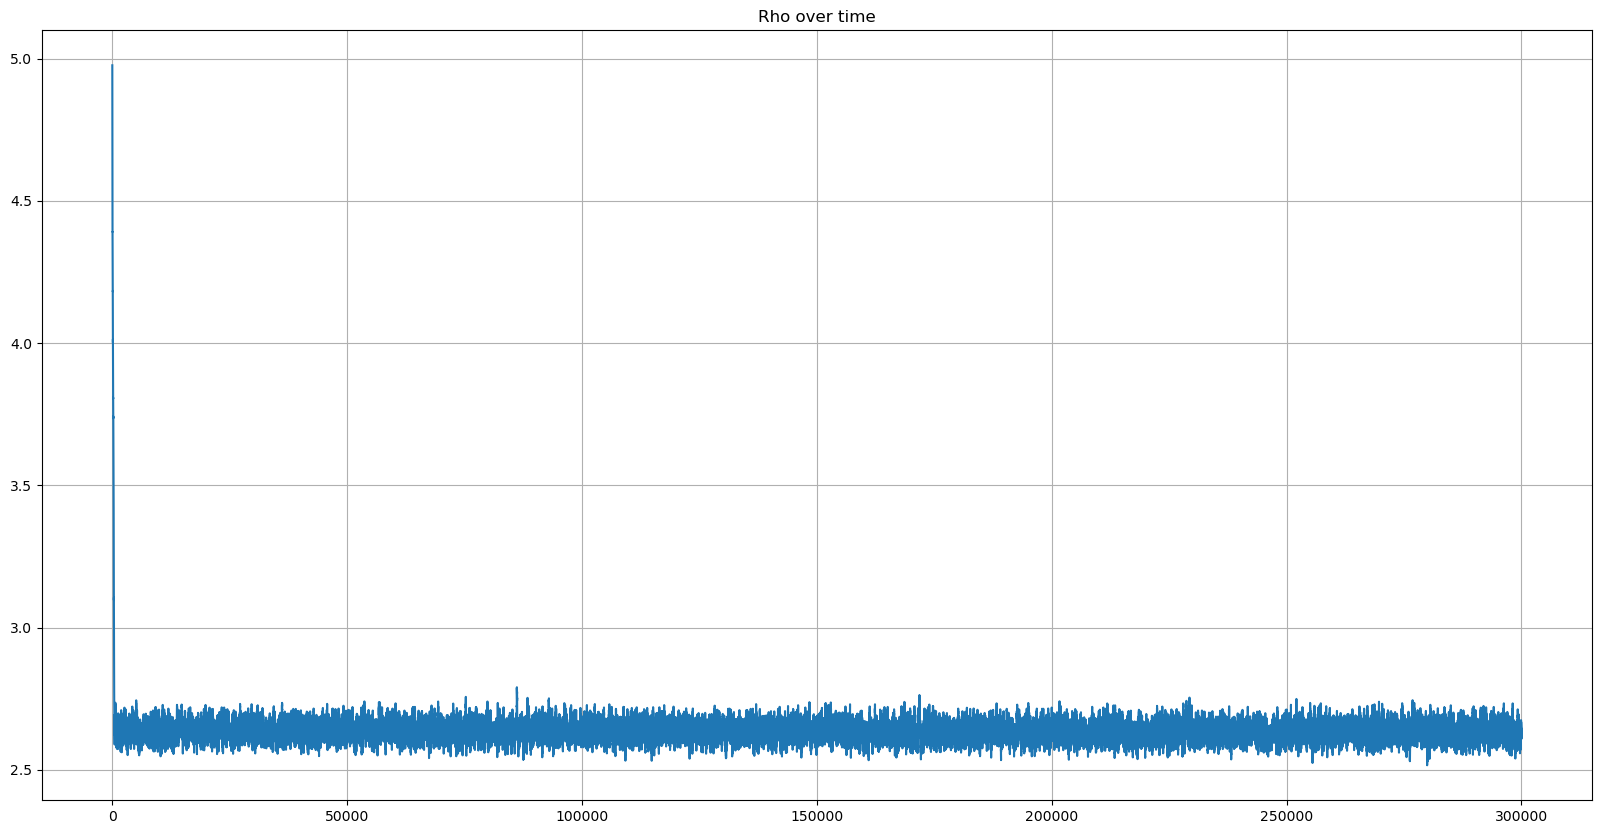

In [37]:
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(np.arange(ite), rhos)
plt.title("Rho over time")
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

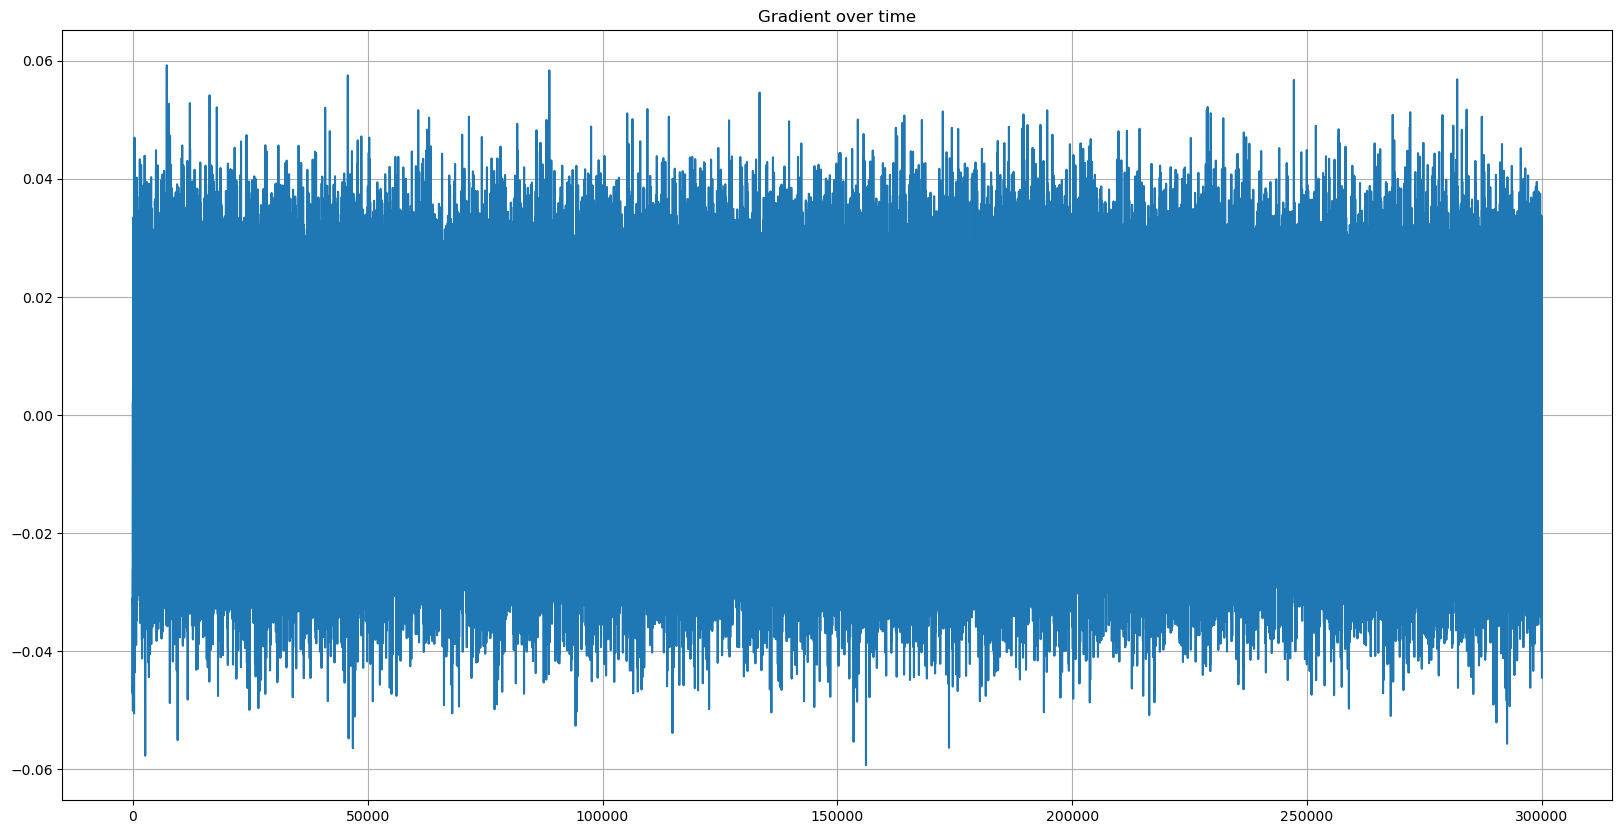

In [38]:
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(np.arange(ite)[:], grads[:])
plt.title("Gradient over time")
plt.grid()
plt.show()